In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
T = 100000  # horizon
K = 5  # number of arms

# Range of means and variances
mean_min = 0
mean_max = 1
variance_min = 1.1  # avoid 1-subgaussian
variance_max = 5

In [6]:
# Random means and variances
means = []
variances = []
for a in range(K):
    means.append(np.random.uniform(mean_min, mean_max))
    variances.append(np.random.uniform(variance_min, variance_max))
best_arm = np.argmax(means)  # index of arm with max mean

print("Randomly generated means:", means)
print("Randomly generated variances:", variances)
print("Best arm index:", best_arm)
print("Best arm mean:", means[best_arm])

Randomly generated means: [0.02070574056132457, 0.4178170532948313, 0.1610748504554923, 0.05204169554264704, 0.44043106987480696]
Randomly generated variances: [3.5528724231434183, 3.3440587811129463, 1.201762493144523, 1.9299535014728313, 1.1514410425294657]
Best arm index: 4
Best arm mean: 0.44043106987480696


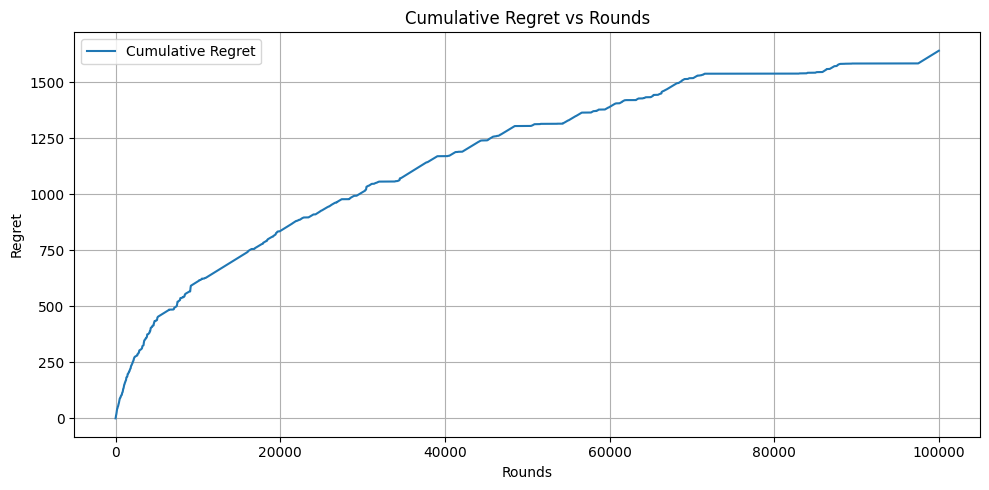

In [7]:
# Known variance UCB
def select_arm_known_variance(t):
    ucb_values = []
    for a in range(K):
        if counts[a] == 0:
            ucb_values.append(np.inf)
        else:
            ucb_values.append(emp_means[a] + np.sqrt((4 * variances[a] * np.log(T)) / counts[a]))  # use known variances
    return np.argmax(ucb_values)  # index of arm with max ucb

# Tracking
counts = np.zeros(K)  # counts how may times each arm is pulled, initialized to 0
emp_means = np.empty(K)  # empirical means of each arm
emp_variances = np.ones(K)  # emperical variances of each arm, initialized to 1 (safe to be empty, but compiler might complain)
regret = np.zeros(T + 1)  # cumulative regret up to round t, initialized to 0

# Regret
for t in range(1, T + 1):
    arm = select_arm_known_variance(t)  # arm pulled at round t

    # Random reward from normal distribution
    reward = np.random.normal(loc=means[arm], scale=np.sqrt(variances[arm]))

    # Update
    counts[arm] += 1
    emp_means[arm] += (reward - emp_means[arm]) / counts[arm]

    # Update cumulative regret
    regret[t] = regret[t - 1] + (means[best_arm] - means[arm])

# Plot
plt.figure(figsize=(10, 5))
plt.plot(range(T + 1), regret, label="Cumulative Regret")
plt.xlabel("Rounds")
plt.ylabel("Regret")
plt.title("Cumulative Regret vs Rounds")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

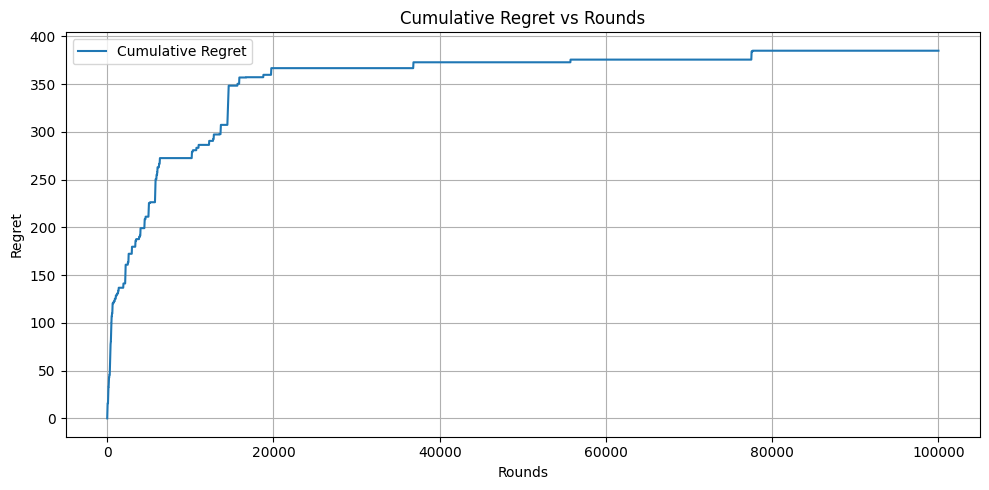

In [8]:
# Unknown variance UCB
def select_arm_unknown_variance(t):
    ucb_values = []
    for a in range(K):
        if counts[a] == 0:
            ucb_values.append(np.inf)
        else:
            ucb_values.append(emp_means[a] + np.sqrt((4 * emp_variances[a] * np.log(T)) / counts[a]))  # use empirical variances
    return np.argmax(ucb_values)  # index of arm with max ucb

# Tracking
counts = np.zeros(K)  # counts how may times each arm is pulled, initialized to 0
emp_means = np.empty(K)  # empirical means of each arm
emp_variances = np.ones(K)  # emperical variances of each arm, initialized to 1 (safe to be empty, but compiler might complain)
regret = np.zeros(T + 1)  # cumulative regret up to round t, initialized to 0

# Regret
for t in range(1, T + 1):
    arm = select_arm_unknown_variance(t)  # arm pulled at round t

    # Random reward from normal distribution
    reward = np.random.normal(loc=means[arm], scale=np.sqrt(variances[arm]))

    # Update
    counts[arm] += 1
    emp_means[arm] += (reward - emp_means[arm]) / counts[arm]

    # Update empirical variance
    if counts[arm] > 1:
        emp_variances[arm] = np.var(np.random.normal(means[arm], np.sqrt(variances[arm]), int(counts[arm])))

    # Update cumulative regret
    regret[t] = regret[t - 1] + (means[best_arm] - means[arm])

# Plot
plt.figure(figsize=(10, 5))
plt.plot(range(T + 1), regret, label="Cumulative Regret")
plt.xlabel("Rounds")
plt.ylabel("Regret")
plt.title("Cumulative Regret vs Rounds")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()